<a href="https://colab.research.google.com/github/Taeu/FPO/blob/master/MIS_FULL_WEEK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install finance-datareader

In [0]:
import urllib.request
import json
import pandas as pd
from bs4 import BeautifulSoup
import urllib
from urllib import request
import re
import numpy as np
import datetime
client_id = 'haQoQuQqDY8FwcshDiBY'
client_secret = ###

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
file_path = 'gdrive/My Drive/Colab Notebooks/kospi200_구성종목_주가_시가총액등'
file_name1 = 'kospi200_pdf_comp_20140101_20190931.xlsx'
file_name2 = 'kospi200_pdf_mkt_cap_201401_201909.xlsx'
file_name3 = 'kospi200_pdf_mkt_weight_201401_201909.xlsx'
kp200 = pd.read_excel(file_path+'/'+file_name1)
kp200_codes_list = kp200[:200].code
len(kp200_codes_list)
kp200_codes_list = kp200_codes_list.tolist()
kp200_names_list =kp200[:200].name.tolist()
kp_informations = pd.read_excel(file_path+'/'+'상장법인목록.xlsx')
kp_informations.head(3)

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,하나금융14호스팩,332710,금융 지원 서비스업,기업인수합병,2019-11-01,12월,홍지헌,NaN,서울특별시
1,신한제6호스팩,333050,금융 지원 서비스업,기업인수 및 합병,2019-10-31,12월,김남엽,NaN,서울특별시
2,티라유텍,322180,소프트웨어 개발 및 공급업,스마트팩토리 솔루션,2019-10-31,12월,"김정하, 조원철",http://thirautech.com,서울특별시


In [0]:
kp_company_name_list = kp_informations['회사명'].tolist()
kp200  = []
for a in kp_company_name_list:
  if a in kp200_names_list:
    kp200.append(a)
len(kp200)

156

# 1번째 crowling test

In [0]:
def get_trend(body):
    url = "https://openapi.naver.com/v1/datalab/search"

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    request.add_header("Content-Type", "application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))

    return json.loads(response.read().decode('utf-8'))

In [0]:
print(len(kp_informations))
kp_informations_names = kp_informations.회사명.values.tolist()
idx = 0
drop_idx = []
i = 0
for name in kp_informations_names:
  if name not in kp200_names_list:
    drop_idx.append(i)
  i+=1
print(len(drop_idx))
kp200_inform = kp_informations.drop(drop_idx)
len(kp200_inform)

2323
2167


156

In [0]:
# 자동화를 위해, 그리고 같은 스케일을 가져오기 위해 하나씩 분석
from tqdm import tqdm
from datetime import datetime
names = kp200_inform.회사명.values
body_dict = {
    "startDate": "2019-01-01",
    "endDate": "2019-03-31",
    "timeUnit": "week",
}


for idx in tqdm(range(len(names))): # names
  name = names[idx]
  body_dict['keywordGroups'] = [{'groupName': name,'keywords':[name]}]
  body= json.dumps(body_dict)
  result = get_trend(body)
  
  if idx == 0 :
    data = result['results'][0]['data']
    time = np.array([datetime.strptime(i['period'],'%Y-%m-%d') for i in data])
    value = np.array([i['ratio'] for i in data])
    data = pd.DataFrame({'Time':time, idx : value})
  elif idx >= 1 : 
    data1 = result['results'][0]['data']
    time = np.array([datetime.strptime(i['period'],'%Y-%m-%d') for i in data1])
    value = np.array([i['ratio'] for i in data1])
    data1 = pd.DataFrame({'Time':time, idx : value})
    data = pd.merge(data,data1,on = ['Time'], sort= False)

100%|██████████| 156/156 [02:00<00:00,  1.37it/s]


In [0]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
0,2018-12-31,60.32359,42.16422,31.80252,38.20492,58.91563,65.99855,63.71111,21.07536,58.80398,41.50571,53.79399,25.53483,78.13454,14.77761,84.44055,83.88595,64.35482,42.47594,13.70125,75.50480,20.33743,74.20819,66.47766,24.74064,67.91777,32.70234,62.74639,47.18140,53.81526,44.77131,95.64822,48.27365,55.64617,38.43240,70.82343,10.47374,38.52040,3.51651,64.39332,...,59.17143,56.19782,50.27053,49.64572,58.53446,59.31508,4.63393,56.76800,70.30871,45.78845,10.90702,54.75589,67.97341,50.80533,4.58847,54.87092,51.59483,80.00790,74.39711,47.12174,47.69257,100.00000,59.72299,66.85803,52.49082,32.85904,47.53954,65.24885,66.52638,24.60869,31.00125,47.79108,100.00000,66.89864,66.33584,45.20676,43.03741,55.05564,3.14390,92.23682
1,2019-01-07,79.43871,60.16250,38.70020,52.97855,81.47635,79.71716,80.65784,30.56575,82.37322,86.13461,59.89606,34.95229,100.00000,24.74519,100.00000,68.90256,88.63033,63.35390,18.40517,100.00000,31.83744,83.07407,74.59487,39.30027,86.05514,45.04418,71.78833,57.44587,74.31128,78.47684,99.24961,71.03225,60.50815,62.67360,91.63714,11.34297,64.27411,28.67372,76.03523,...,93.95761,84.06109,69.49951,74.66182,76.91962,72.52127,5.65382,87.39349,100.00000,100.00000,16.36054,73.19023,98.09810,68.98297,5.79839,67.12128,72.43730,88.02320,84.46437,74.72430,61.55447,96.70151,98.83540,86.32843,85.28132,67.01915,100.00000,69.73082,75.05020,28.21256,47.94611,66.84762,36.67202,80.79536,100.00000,79.33185,63.27208,60.25623,100.00000,99.14267
2,2019-01-14,100.00000,73.66736,64.76131,52.18427,69.33319,78.49228,80.01430,31.60224,86.87741,96.91880,58.93792,37.72766,87.49023,22.02869,91.82073,67.45358,88.45587,68.82374,15.19446,97.35576,23.30419,89.89218,80.48036,31.50175,96.49114,93.12110,74.08606,68.09200,76.77023,67.38959,100.00000,71.13881,64.42910,55.75981,90.48471,11.63912,68.45624,15.19821,86.78554,...,97.02347,82.06824,66.69620,100.00000,70.61188,71.92658,100.00000,94.06467,93.08342,65.08078,22.44350,73.69528,89.73363,63.50667,7.17934,69.50803,100.00000,78.37321,100.00000,70.40141,89.07009,89.60198,83.75991,81.49087,87.53031,68.72993,94.37609,74.12646,73.89446,48.56611,42.65557,66.97865,32.61709,80.02761,77.92774,76.99504,59.70777,62.63644,5.06223,90.98694
3,2019-01-21,97.37972,57.60187,50.40777,77.36298,67.42650,80.98658,93.29638,29.84236,100.00000,91.39913,65.57184,48.45331,90.00497,37.17076,79.25088,80.49000,100.00000,98.00629,17.81181,77.47596,26.47983,100.00000,85.61627,34.05237,84.66518,72.09278,70.92023,64.46448,87.34587,67.75463,99.84948,62.59946,71.67503,53.63870,90.10706,11.56825,55.01700,24.44567,79.21862,...,84.26581,73.07736,71.31396,88.94485,83.39494,72.73659,13.14366,82.24244,89.16081,62.32046,29.23330,75.21043,94.75522,62.58628,6.83143,74.01363,66.81275,86.04574,82.04605,75.83811,60.07980,85.03841,85.69515,78.55362,76.16073,85.74354,88.22495,78.75317,72.41401,31.76992,42.73251,73.97978,40.42523,73.71168,71.39737,76.34569,60.61545,58.10477,4.03590,92.41273
4,2019-01-28,78.86597,100.00000,41.66153,100.00000,73.95611,78.75396,78.69145,44.90390,93.59482,100.00000,59.68494,46.22723,86.07657,26.12251,72.10515,91.46585,93.21626,76.32359,14.26699,71.75480,21.82588,95.96452,81.80034,29.55927,73.15162,86.38782,69.61093,70.93592,100.00000,54.95669,95.82752,67.53339,71.73776,55.94666,100.00000,14.07518,65.99025,19.75282,95.61858,...,98.41273,100.00000,100.00000,76.72845,100.00000,76.03814,6.30087,85.08907,93.83191,61.38539,21.25683,100.00000,71.75779,67.14219,6.82405,67.41354,71.46335,79.16419,91.40343,74.80149,56.67938,77.12437,100.00000,79.75522,85.25964,67.08005,85.85237,100.00000,86.58619,27.77747,70.58969,63.17858,38.89123,72.74233,79.93251,76.61056,53.30971,59.77325,4.21319,92.74511


In [0]:
#data.to_excel("kp200_trend_timeseries.xlsx")
data.to_csv(file_path+'/'+"kp200_trend_ts_week.csv", mode='w') # 다시 불러올때 Time 형으로 변환, 굳이 필요한가 싶지만..

# From Now on let's data analysis from different Time Series

In [0]:
data_new = pd.read_csv(file_path+'/'+"kp200_trend_ts_week.csv", index_col=0)

In [0]:
data_new.head(3)

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
0,2018-12-31,60.32359,42.16422,31.80252,38.20492,58.91563,65.99855,63.71111,21.07536,58.80398,41.50571,53.79399,25.53483,78.13454,14.77761,84.44055,83.88595,64.35482,42.47594,13.70125,75.50480,20.33743,74.20819,66.47766,24.74064,67.91777,32.70234,62.74639,47.18140,53.81526,44.77131,95.64822,48.27365,55.64617,38.43240,70.82343,10.47374,38.52040,3.51651,64.39332,...,59.17143,56.19782,50.27053,49.64572,58.53446,59.31508,4.63393,56.76800,70.30871,45.78845,10.90702,54.75589,67.97341,50.80533,4.58847,54.87092,51.59483,80.00790,74.39711,47.12174,47.69257,100.00000,59.72299,66.85803,52.49082,32.85904,47.53954,65.24885,66.52638,24.60869,31.00125,47.79108,100.00000,66.89864,66.33584,45.20676,43.03741,55.05564,3.14390,92.23682
1,2019-01-07,79.43871,60.16250,38.70020,52.97855,81.47635,79.71716,80.65784,30.56575,82.37322,86.13461,59.89606,34.95229,100.00000,24.74519,100.00000,68.90256,88.63033,63.35390,18.40517,100.00000,31.83744,83.07407,74.59487,39.30027,86.05514,45.04418,71.78833,57.44587,74.31128,78.47684,99.24961,71.03225,60.50815,62.67360,91.63714,11.34297,64.27411,28.67372,76.03523,...,93.95761,84.06109,69.49951,74.66182,76.91962,72.52127,5.65382,87.39349,100.00000,100.00000,16.36054,73.19023,98.09810,68.98297,5.79839,67.12128,72.43730,88.02320,84.46437,74.72430,61.55447,96.70151,98.83540,86.32843,85.28132,67.01915,100.00000,69.73082,75.05020,28.21256,47.94611,66.84762,36.67202,80.79536,100.00000,79.33185,63.27208,60.25623,100.00000,99.14267
2,2019-01-14,100.00000,73.66736,64.76131,52.18427,69.33319,78.49228,80.01430,31.60224,86.87741,96.91880,58.93792,37.72766,87.49023,22.02869,91.82073,67.45358,88.45587,68.82374,15.19446,97.35576,23.30419,89.89218,80.48036,31.50175,96.49114,93.12110,74.08606,68.09200,76.77023,67.38959,100.00000,71.13881,64.42910,55.75981,90.48471,11.63912,68.45624,15.19821,86.78554,...,97.02347,82.06824,66.69620,100.00000,70.61188,71.92658,100.00000,94.06467,93.08342,65.08078,22.44350,73.69528,89.73363,63.50667,7.17934,69.50803,100.00000,78.37321,100.00000,70.40141,89.07009,89.60198,83.75991,81.49087,87.53031,68.72993,94.37609,74.12646,73.89446,48.56611,42.65557,66.97865,32.61709,80.02761,77.92774,76.99504,59.70777,62.63644,5.06223,90.98694


In [0]:
import matplotlib.pyplot as plt
data_new.plot(x='Time',figsize = (15,7))
fig = plt.gcf()
#fig.savefig(file_path+'/'+'output1.png')

In [0]:
data_new.plot(x='Time',figsize = (15,7))
fig = plt.gcf()
#fig.savefig(file_path+'/'+'output1.png')

In [0]:
kp200_inform.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
142,세아제강,306200,1차 철강 제조업,강관,2018-10-05,12월,"이휘령, 김석일",http://www.seahsteel.co.kr,서울특별시
165,한일시멘트,300720,"시멘트, 석회, 플라스터 및 그 제품 제조업","시멘트, 레미콘, 레미탈",2018-08-06,12월,전근식,http://www.hanilcement.com,서울특별시
215,SK케미칼,285130,합성고무 및 플라스틱 물질 제조업,"PETG 수지, PET 수지, 바이오디젤, 백신",2018-01-05,12월,"김철, 전광현",http://www.skchemicals.com,경기도
235,동아타이어,282690,고무제품 제조업,타이어 및 튜브,2017-11-29,12월,"김만수, 김상헌",http://www.dongahtire.co.kr,경상남도
245,롯데제과,280360,기타 식품 제조업,"껌,캔디,초코,비스켓,빙과",2017-10-30,12월,"신동빈, 이영호, 민명기",http://www.lotteconf.co.kr/,서울특별시


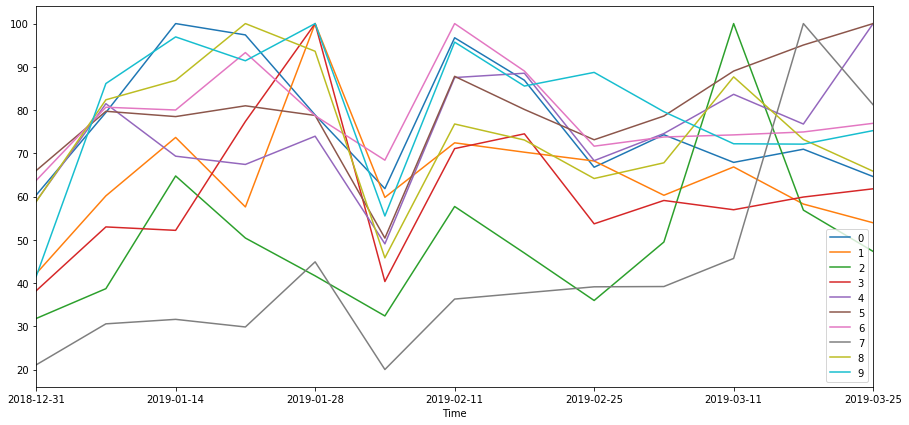

In [0]:
names = kp200_inform.회사명.values
data_new_10 = data_new[['Time', '0', '1','2','3','4','5','6','7','8','9']]
# '세아제강', '한일시멘트', 'SK케미칼', '동아타이어', '롯데제과', '오리온', '크라운제과', '한솔제지','삼성물산', '만도'
data_new_10.plot(x='Time',figsize = (15,7))
fig = plt.gcf()
fig.savefig(file_path+'/'+'output10.png')

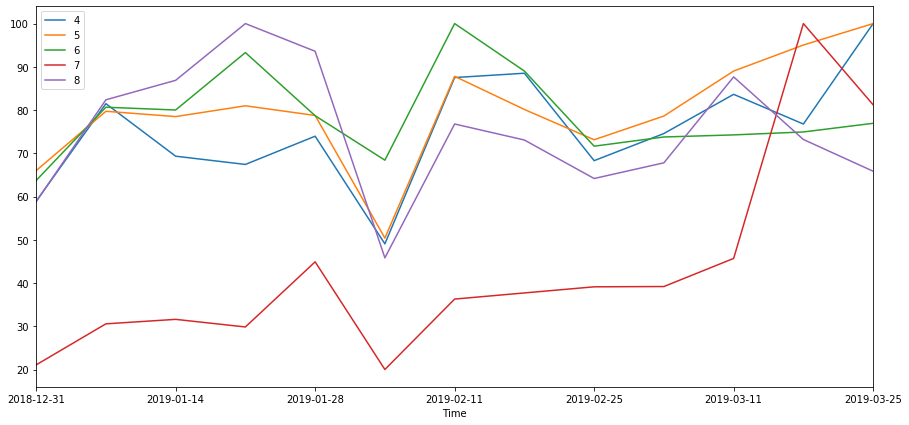

In [0]:
data_new_5 = data_new[['Time', '4','5','6','7','8']]
#'롯데제과', '오리온', '크라운제과', '한솔제지','삼성물산'
data_new_5.plot(x='Time',figsize = (15,7))
fig = plt.gcf()
fig.savefig(file_path+'/'+'output5.png')

In [0]:
data_new.shape

(13, 157)

# Change rate 활용

In [0]:
trend_indexs = data_new[str(1)].values.tolist()
changes = []
for j in range(1,len(trend_indexs)):
  changes.append(trend_indexs[j]/trend_indexs[j-1]-1)
print(len(changes))
print(changes[:5])

12
[0.42686144792907355, 0.2244730521504259, -0.2180815221286606, 0.7360547496114276, -0.40194510000000006]


In [0]:
data_new_change_rate = pd.DataFrame()
data_new_change_rate['Time'] = data_new['Time'][1:]
for i in range(156):
  trend_indexs = data_new[str(i)].values.tolist()
  changes = []
  for j in range(1,len(trend_indexs)):
    changes.append(trend_indexs[j]/trend_indexs[j-1] - 1)
  data_new_change_rate[str(i)] = changes

In [0]:
data_new_change_rate.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155
1,2019-01-07,0.316876,0.426861,0.216891,0.386694,0.382933,0.207862,0.265993,0.450307,0.400810,1.075247,0.113434,0.368808,0.279844,0.674506,0.184265,-0.178616,0.377214,0.491524,0.343320,0.324419,0.565460,0.119473,0.122104,0.588490,0.267049,0.377399,0.144103,0.217553,0.380859,0.752838,0.037652,0.471450,0.087373,0.630749,0.293882,0.082991,0.668573,7.154028,0.180794,...,0.587888,0.495807,0.382510,0.503892,0.314091,0.222645,0.220092,0.539485,0.422299,1.183957,0.500001,0.336664,0.443183,0.357790,0.263687,0.223258,0.403964,0.100181,0.135318,0.585771,0.290651,-0.032985,0.654897,0.291220,0.624690,1.039595,1.103512,0.068690,0.128127,0.146447,0.546586,0.398747,-0.633280,0.207728,0.507481,0.754867,0.470165,0.094461,30.807627,0.074871
2,2019-01-14,0.258832,0.224473,0.673410,-0.014992,-0.149039,-0.015365,-0.007979,0.033910,0.054680,0.125202,-0.015997,0.079405,-0.125098,-0.109779,-0.081793,-0.021029,-0.001968,0.086338,-0.174446,-0.026442,-0.268026,0.082073,0.078899,-0.198434,0.121271,1.067328,0.032007,0.185325,0.033090,-0.141281,0.007561,0.001500,0.064800,-0.110314,-0.012576,0.026109,0.065067,-0.469960,0.141386,...,0.032630,-0.023707,-0.040336,0.339373,-0.082004,-0.008200,16.687157,0.076335,-0.069166,-0.349192,0.371807,0.006901,-0.085266,-0.079386,0.238161,0.035559,0.380504,-0.109630,0.183931,-0.057851,0.447013,-0.073417,-0.152531,-0.056037,0.026371,0.025527,-0.056239,0.063037,-0.015400,0.721436,-0.110343,0.001960,-0.110573,-0.009502,-0.220723,-0.029456,-0.056333,0.039501,-0.949378,-0.082263
3,2019-01-21,-0.026203,-0.218082,-0.221638,0.482496,-0.027500,0.031778,0.165996,-0.055688,0.151047,-0.056951,0.112558,0.284291,0.028743,0.687380,-0.136896,0.193265,0.130507,0.424019,0.172257,-0.204197,0.136269,0.112444,0.063816,0.080968,-0.122560,-0.225817,-0.042732,-0.053274,0.137757,0.005417,-0.001505,-0.120038,0.112464,-0.038040,-0.004174,-0.006089,-0.196319,0.608457,-0.087191,...,-0.131490,-0.109554,0.069236,-0.110552,0.181033,0.011262,-0.868563,-0.125682,-0.042141,-0.042414,0.302529,0.020560,0.055961,-0.014493,-0.048460,0.064821,-0.331873,0.097897,-0.179540,0.077224,-0.325477,-0.050932,0.023105,-0.036044,-0.129893,0.247543,-0.065177,0.062416,-0.020035,-0.345842,0.001804,0.104528,0.239388,-0.078922,-0.083800,-0.008434,0.015202,-0.072349,-0.202743,0.015670
4,2019-01-28,-0.190119,0.736055,-0.173510,0.292608,0.096840,-0.027568,-0.156543,0.504703,-0.064052,0.094102,-0.089778,-0.045943,-0.043646,-0.297230,-0.090166,0.136363,-0.067837,-0.221238,-0.199015,-0.073844,-0.175755,-0.040355,-0.044570,-0.131947,-0.135989,0.198287,-0.018462,0.100388,0.144874,-0.188887,-0.040280,0.078817,0.000875,0.043028,0.109791,0.216708,0.199452,-0.191971,0.207022,...,0.167884,0.368413,0.402250,-0.137348,0.199114,0.045390,-0.520615,0.034613,0.052390,-0.015004,-0.272856,0.329603,-0.242704,0.072794,-0.001080,-0.089174,0.069606,-0.079975,0.114050,-0.013669,-0.056598,-0.093064,0.166927,0.015297,0.119470,-0.217666,-0.026892,0.269790,0.195710,-0.125668,0.651897,-0.146002,-0.037947,-0.013151,0.119544,0.003469,-0.120526,0.028715,0.043928,0.003597
5,2019-02-04,-0.216049,-0.401945,-0.222464,-0.596505,-0.336598,-0.360127,-0.130622,-0.554460,-0.510410,-0.444997,-0.358343,-0.535804,-0.411158,-0.569030,-0.464026,0.093304,-0.442770,-0.571270,-0.340093,-0.391290,-0.541206,-0.456286,-0.423240,-0.338376,-0.218110,-0.420575,-0.260526,-0.377536,-0.479603,-0.454415,-0.016031,-0.425416,-0.409270,-0.443130,-0.489430,-0.077294,-0.437650,-0.665684,-0.341916,...,-0.362608,-0.526161,-0.597323,-0.344317,-0.617535,-0.285194,0.138470,-0.421256,-0.457335,-0.501584,-0.521117,-0.555977,-0.272143,-0.349554,-0.420542,-0.327312,-0.338671,-0.232140,-0.468284,-0.460268,-0.247934,-0.154445,-0.499480,-0.442553,-0.540020,-0.479119,-0.505629,-0.5360

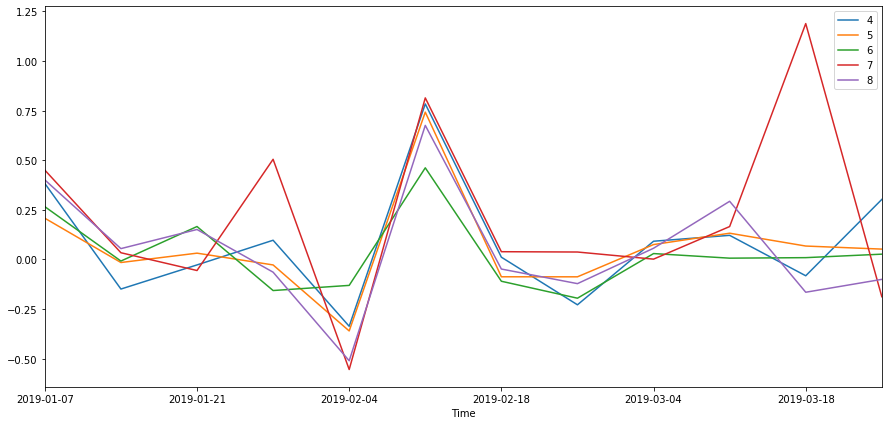

In [0]:
data_new_5 = data_new_change_rate[['Time', '4','5','6','7','8']]
#'롯데제과', '오리온', '크라운제과', '한솔제지','삼성물산'
data_new_5.plot(x='Time',figsize = (15,7))
fig = plt.gcf()
fig.savefig(file_path+'/'+'output5_change_rate.png')

In [0]:
df_ch = data_new_change_rate.drop(['Time'],axis=1)
df_ch.shape
df_ch.values.shape # (242, 156)

df_ch_np = df_ch.to_numpy()
df_ch_np = df_ch_np.T
df_ch_np.shape # (156, 242)

(156, 12)

In [0]:
def cos_matrix_multiplication(matrix, vector):
    """
    Calculating pairwise cosine distance using matrix vector multiplication.
    """
    dotted = matrix.dot(vector)
    matrix_norms = np.linalg.norm(matrix, axis=1)
    vector_norm = np.linalg.norm(vector)
    matrix_vector_norms = np.multiply(matrix_norms, vector_norm)
    neighbors = np.divide(dotted, matrix_vector_norms)
    return neighbors

In [0]:
from tqdm import tqdm
wl = []
for i in tqdm(range(len(df_ch_np)),mininterval = 3):
    nearest = list(cos_matrix_multiplication(df_ch_np, df_ch_np[i]).argsort()[-11:-1][::-1])
    li = []
    for x in nearest:
        li.append(x)
    wl.append(li)
wl =  np.asarray(wl)
print(wl.shape)
#np.save(directory+'article_similarity_recent_t',wl)

100%|██████████| 156/156 [00:00<00:00, 11545.38it/s]

(156, 10)


In [0]:
wl[4]
names[4]

'롯데제과'

In [0]:
for i in range(156):
  print('company name : ',names[i],end="'s ")
  print('most similarly company are :', end = ' ')
  for j in wl[i]:
    print(names[j], end= ' ')
  print()

company name :  세아제강's most similarly company are : 롯데쇼핑 신한지주 락앤락 태광산업 크라운제과 아이에스동서 에스원 한솔테크닉스 고려제강 퍼시스 
company name :  한일시멘트's most similarly company are : 삼성중공업 삼성엔지니어링 현대상선 현대미포조선 하나금융지주 대우건설 현대건설 대림산업 GS건설 대우조선해양 
company name :  SK케미칼's most similarly company are : 모토닉 유니드 하이트진로 태광산업 한미약품 국도화학 삼성물산 한섬 신한지주 농심 
company name :  동아타이어's most similarly company are : LG하우시스 삼성전기 대우건설 삼성생명 GS 후성 S&T중공업 삼성증권 삼성전자 일진디스플 
company name :  롯데제과's most similarly company are : 두산인프라코어 롯데푸드 아이에스동서 롯데케미칼 오리온 종근당홀딩스 SK텔레콤 무학 금호타이어 SK 
company name :  오리온's most similarly company are : 한화생명 SK 롯데쇼핑 종근당홀딩스 아이에스동서 국도화학 한솔테크닉스 삼성생명 삼성전기 신한지주 
company name :  크라운제과's most similarly company are : 후성 한솔테크닉스 동원F&B 롯데쇼핑 녹십자 한세실업 롯데케미칼 대한전선 SKC 아이에스동서 
company name :  한솔제지's most similarly company are : 호텔신라 GS건설 LG이노텍 락앤락 삼광글라스 LG상사 빙그레 삼성증권 CJ제일제당 SK이노베이션 
company name :  삼성물산's most similarly company are : GS 대한전선 롯데푸드 오리온 종근당홀딩스 SK텔레콤 농심 LS산전 아이에스동서 SK네트웍스 
company name :  만도's most similarly company 

In [0]:
# Let's do the clustering for Stock Portfolio

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

In [0]:
df_ch_np.shape

(156, 12)

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20)
kmeans.fit(df_ch_np)
y_kmeans = kmeans.predict(df_ch_np)

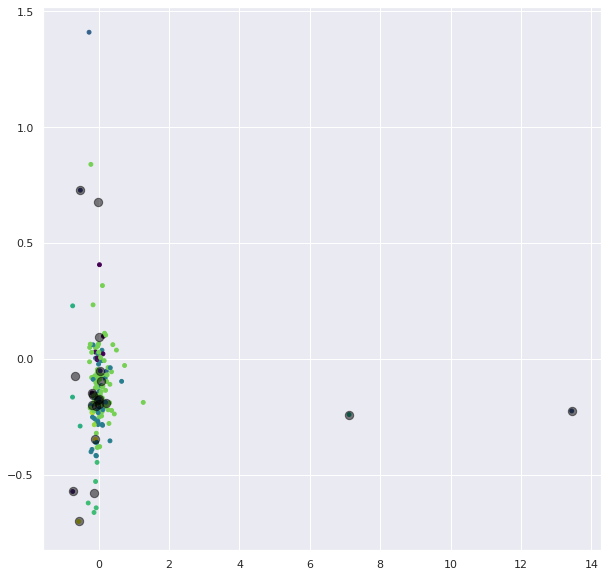

In [0]:
fig = plt.subplots(figsize=(10,10))
plt.scatter(df_ch_np[:, 3], df_ch_np[:, 7], c=y_kmeans, s=15, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 3], centers[:, 7], c='black', s=70, alpha=0.5);

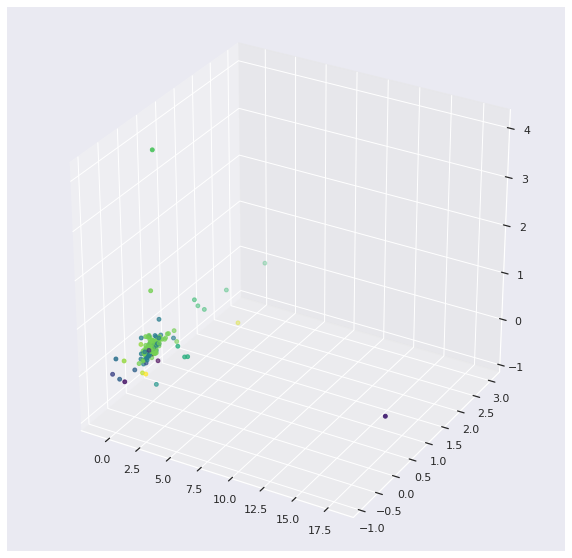

In [0]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_ch_np[:, 2], df_ch_np[:, 6],df_ch_np[:,10], c=y_kmeans, s=15, cmap='viridis')

#centers = kmeans.cluster_centers_
#ax.scatter(centers[:, 3], centers[:, 7],df_ch_np[:,80], c='black', s=70, alpha=0.5);

In [0]:
y_kmeans

array([15, 15, 17, 15, 15, 15, 15, 15, 15,  8,  8, 13, 15, 13,  8,  0, 15,
       15, 10, 15, 17, 15, 15, 13, 15, 15, 15, 15, 15,  8,  0,  8, 15,  8,
       15,  6, 15,  1, 15, 15,  8, 15, 15, 15, 15, 15,  8, 15,  8,  8, 15,
       15, 15, 15,  0, 16,  0, 11, 15, 15, 15, 15,  8,  8, 15,  9, 15,  5,
        8, 15, 13, 15, 15, 15,  8, 12, 15,  8, 15,  0, 15,  8, 15, 15, 12,
        8, 15, 19, 15,  8,  8, 15, 14,  8, 15, 15, 12,  8,  8, 15, 13, 15,
       15, 15,  8,  2, 15, 15, 15, 15, 15, 18,  8, 15,  0,  8, 15, 15, 15,
       15,  8, 15,  4, 15, 15,  8,  6,  8, 15,  8,  7, 15, 15, 15, 15,  8,
        8, 15, 15, 15,  8,  8,  8, 15, 15, 16,  8, 15, 15, 15, 15,  8,  8,
       15,  3, 15], dtype=int32)

In [0]:
# https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [0]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_ch_np)
    Sum_of_squared_distances.append(km.inertia_)

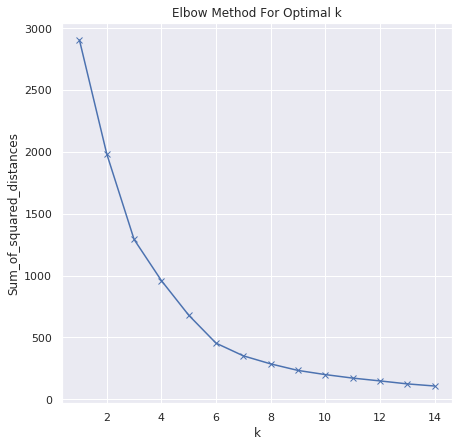

In [0]:
K = range(1,15)
fig = plt.figure(figsize=(7,7))
plt.plot(K, Sum_of_squared_distances, 'bx-')

plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
#https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
from sklearn.metrics import silhouette_score

sil = [] 
for k in range(2, 14+1):
  kmeans = KMeans(n_clusters = k).fit(df_ch_np)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_ch_np, labels, metric = 'euclidean'))

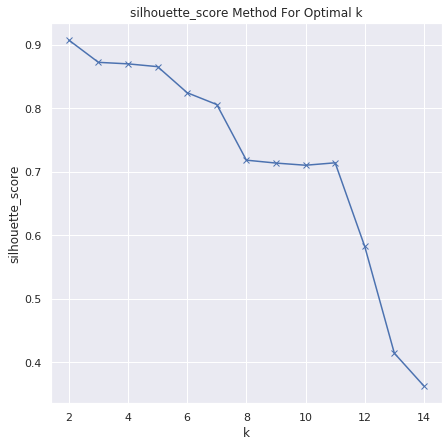

In [0]:
K = range(2,14+1)
fig = plt.figure(figsize=(7,7))
plt.plot(K, sil, 'bx-')

plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('silhouette_score Method For Optimal k')
plt.show()